In [416]:
#importing the required libraries
import numpy as np
import pandas as pd
import pickle
#import matrix_factorization_utilities
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [330]:
# Reading the ratings data
ratings = pd.read_csv('../ml-latest/ratings.csv')
ratings=ratings[:5000]

In [331]:
len(ratings)

5000

In [332]:
# Taking the important columns
ratings = ratings[['userId', 'movieId','rating']]

In [333]:
# In this case there are no such cases where the user has rated the same movie twice.
len(ratings_df)

56

In [334]:
# Inspecting the data
ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [335]:
ratings_df.head()

rating                                                                 \
movieId 1      2      3      5      6      7      9      10     11     12       
userId                                                                          
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          4.0    4.0    NaN    2.0    4.5    NaN    NaN    4.0    3.5    NaN   
5          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         ...                                                                 \
movieId  ... 174053 174055 175303 175569 176371 176423 177593 177615 177765   
userId   ...                                                                  
1        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                
movieId 187595  
userId          
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  

[5 rows x 2036 columns]

In [336]:
# Finding no of unique users
len(ratings['userId'].unique())

56

In [337]:
# Finding the percentage count of each rating value 
rating_count = ratings.groupby('rating').count()
rating_count['perc_total']=round(rating_count['userId']*100/rating_count['userId'].sum(),1)

rating_count

,userId,movieId,perc_total
rating,,,
0.5,118,118,2.4
1.0,106,106,2.1
1.5,95,95,1.9
2.0,266,266,5.3
2.5,203,203,4.1
3.0,899,899,18.0
3.5,632,632,12.6
4.0,1374,1374,27.5
4.5,550,550,11.0


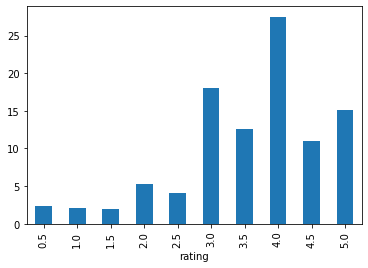

In [338]:
rating_count['perc_total'].plot.bar()

In [339]:
list_of_movies = pd.read_csv('../ml-latest/movies.csv')

len(list_of_movies)

58098

In [340]:
list_of_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [341]:
tags = pd.read_csv('../ml-latest/tags.csv')

tags.head()

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [342]:
genres = list_of_movies['genres']

genres.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [343]:
list_of_genre = ""
for index,row in list_of_movies.iterrows():
        list_of_genre += row.genres + "|"
#split the string into a list of values
list_of_genre_split = list_of_genre.split('|')
# remove duplicate values
new_list = list(set(list_of_genre_split))
#remove blank values
new_list.remove('')

new_list

['Action',
 '(no genres listed)',
 'Children',
 'Fantasy',
 'Musical',
 'Thriller',
 'Sci-Fi',
 'Comedy',
 'Adventure',
 'Mystery',
 'Drama',
 'Romance',
 'IMAX',
 'Film-Noir',
 'Western',
 'Documentary',
 'Crime',
 'Animation',
 'War',
 'Horror']

In [344]:
# Adding genres as columns
movies_with_genres = list_of_movies.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [345]:
movies_with_genres.rename_axis(None)
movies_with_genres.head()

,movieId,title,genres,Action,(no genres listed),Children,Fantasy,Musical,Thriller,Sci-Fi,...,Drama,Romance,IMAX,Film-Noir,Western,Documentary,Crime,Animation,War,Horror
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [346]:
# Finding number of unique movies in the dataset.
len(ratings['movieId'].unique())

2036

In [347]:
# Finding the average rating for movie and the number of ratings for each movie
avg_movie_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
avg_movie_rating['movieId']= avg_movie_rating.index

# inspecting the average movie rating data frame
avg_movie_rating.head()

,mean,count,movieId
movieId,,,
1,4.281250,16,1
2,2.937500,8,2
3,3.666667,3,3
5,3.000000,3,5
6,3.666667,6,6


In [348]:
len(avg_movie_rating)

2036

In [349]:
#calculate the percentile count. It gives the no of ratings at least 60% of the movies have
np.percentile(avg_movie_rating['count'],60)

2.0

In [350]:
#Average movie rating of all movies 
avg_rating_all=ratings['rating'].mean()
avg_rating_all
#set a minimum count for number of reviews that the movie has
min_reviews=10
min_reviews
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>min_reviews]
movie_score.head()

,mean,count,movieId
movieId,,,
1,4.281250,16,1
32,3.615385,13,32
47,3.958333,12,47
50,4.392857,14,50
110,4.318182,11,110


In [351]:
len(movie_score)

37

# IMDb Weighted Average Formula

In [352]:
#Function for weighted rating score based on count of reviews
def weighted_rating(x, m=min_reviews, C=avg_rating_all):
    v = x['count']
    R = x['mean']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [353]:
#Calculating the weighted score for each movie
movie_score['weighted_score'] = movie_score.apply(weighted_rating, axis=1)
movie_score.index.name = None
movie_score.head()

C:\Users\Nachiketa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mean,count,movieId,weighted_score
1,4.281250,16,1,4.020154
32,3.615385,13,32,3.609739
47,3.958333,12,47,3.796545
50,4.392857,14,50,4.063500
110,4.318182,11,110,3.977333


In [354]:
#joining movie details and movie ratings

movie_score = pd.merge(movie_score,movies_with_genres,on='movieId')

movie_score.head()

,mean,count,movieId,weighted_score,title,genres,Action,(no genres listed),Children,Fantasy,...,Drama,Romance,IMAX,Film-Noir,Western,Documentary,Crime,Animation,War,Horror
0,4.281250,16,1,4.020154,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,3.615385,13,32,3.609739,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.958333,12,47,3.796545,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.392857,14,50,4.063500,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.318182,11,110,3.977333,Braveheart (1995),Action|Drama|War,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [355]:
#list top scored movies over the whole range of movies
pd.DataFrame(movie_score.sort_values(['weighted_score'],ascending=False)[['title','count','mean','weighted_score','genres']][:10])

,title,count,mean,weighted_score,genres
8,"Shawshank Redemption, The (1994)",20,4.550000,4.234133,Crime|Drama
21,Star Wars: Episode V - The Empire Strikes Back...,13,4.653846,4.196696,Action|Adventure|Sci-Fi
6,Star Wars: Episode IV - A New Hope (1977),19,4.447368,4.156000,Action|Adventure|Sci-Fi
31,American Beauty (1999),16,4.500000,4.154769,Drama|Romance
32,Fight Club (1999),12,4.583333,4.137455,Action|Crime|Drama|Thriller
7,Pulp Fiction (1994),21,4.357143,4.113677,Comedy|Crime|Drama|Thriller
3,"Usual Suspects, The (1995)",14,4.392857,4.063500,Crime|Mystery|Thriller
12,Schindler's List (1993),15,4.366667,4.060960,Drama|War
13,Terminator 2: Judgment Day (1991),13,4.384615,4.044522,Action|Sci-Fi
23,Star Wars: Episode VI - Return of the Jedi (1983),15,4.300000,4.020960,Action|Adventure|Sci-Fi


In [356]:
# Printing best movies according to genre based on weighted score calculated using IMDB formula
def best_movies_by_genre(genre,top_n):
    return pd.DataFrame(movie_score.loc[(movie_score[genre]==1)].sort_values(['weighted_score'],ascending=False)[['title','count','mean','weighted_score']][:top_n])

best_movies_by_genre('Action',10)  

,title,count,mean,weighted_score
21,Star Wars: Episode V - The Empire Strikes Back...,13,4.653846,4.196696
6,Star Wars: Episode IV - A New Hope (1977),19,4.447368,4.156000
32,Fight Club (1999),12,4.583333,4.137455
13,Terminator 2: Judgment Day (1991),13,4.384615,4.044522
23,Star Wars: Episode VI - Return of the Jedi (1983),15,4.300000,4.020960
30,"Matrix, The (1999)",17,4.264706,4.019407
33,Gladiator (2000),12,4.333333,4.001091
22,Raiders of the Lost Ark (Indiana Jones and the...,13,4.269231,3.979304
4,Braveheart (1995),11,4.318182,3.977333
29,Saving Private Ryan (1998),12,4.208333,3.932909


In [357]:
best_movies_by_genre('Drama',10)  

,title,count,mean,weighted_score
8,"Shawshank Redemption, The (1994)",20,4.550000,4.234133
31,American Beauty (1999),16,4.500000,4.154769
32,Fight Club (1999),12,4.583333,4.137455
7,Pulp Fiction (1994),21,4.357143,4.113677
12,Schindler's List (1993),15,4.366667,4.060960
33,Gladiator (2000),12,4.333333,4.001091
9,Forrest Gump (1994),19,4.184211,3.983586
4,Braveheart (1995),11,4.318182,3.977333
15,Fargo (1996),14,4.214286,3.959333
29,Saving Private Ryan (1998),12,4.208333,3.932909


In [358]:
# Creating a data frame with user ratings across all movies in form of matrix used in matrix factorisation
ratings_df = pd.pivot_table(ratings, index='userId', columns='movieId', aggfunc=np.max)

ratings_df.head()

rating                                                                 \
movieId 1      2      3      5      6      7      9      10     11     12       
userId                                                                          
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          4.0    4.0    NaN    2.0    4.5    NaN    NaN    4.0    3.5    NaN   
5          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         ...                                                                 \
movieId  ... 174053 174055 175303 175569 176371 176423 177593 177615 177765   
userId   ...                                                                  
1        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                
movieId 187595  
userId          
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  

[5 rows x 2036 columns]

In [359]:
# merge ratings and movies dataframes
ratings_movies = pd.merge(ratings,list_of_movies, on = 'movieId')

ratings_movies.head()

,userId,movieId,rating,title,genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,481,3.5,Kalifornia (1993),Drama|Thriller
4,4,481,4.0,Kalifornia (1993),Drama|Thriller


In [360]:
#Gets the other top 10 movies which are watched by the people who saw this particular movie
def get_other_movies(movie_name):
    #get all users who watched a specific movie
    df_movie_users_series = ratings_movies.loc[ratings_movies['title']==movie_name]['userId']

    df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userId'])
    
    #get a list of all other movies watched by these users
    other_movies = pd.merge(df_movie_users,ratings_movies,on='userId')
    
    # list of the most commonly watched movies by these other users
    other_users_watched = pd.DataFrame(other_movies.groupby('title')['userId'].count()).sort_values('userId',ascending=False)
    other_users_watched['percentage_watched'] = round(other_users_watched['userId']*100/other_users_watched['userId'][0],1)
    return other_users_watched[:10]

In [361]:
# Get other top 10 movies which are watched by the people who saw 'Jumanji'
get_other_movies('Jumanji (1995)')

,userId,percentage_watched
title,,
Jumanji (1995),8,100.0
Jurassic Park (1993),7,87.5
Forrest Gump (1994),7,87.5
Men in Black (a.k.a. MIB) (1997),6,75.0
"Lost World: Jurassic Park, The (1997)",6,75.0
Terminator 2: Judgment Day (1991),6,75.0
Armageddon (1998),6,75.0
Titanic (1997),6,75.0
Star Wars: Episode VI - Return of the Jedi (1983),6,75.0


In [362]:
from sklearn.neighbors import NearestNeighbors


avg_movie_rating.head()

,mean,count,movieId
movieId,,,
1,4.281250,16,1
2,2.937500,8,2
3,3.666667,3,3
5,3.000000,3,5
6,3.666667,6,6


In [363]:
#only include movies with more than 10 ratings
high_rating = avg_movie_rating.loc[avg_movie_rating['count']>=10]
high_rating.index.name = None
print(len(high_rating))

51


In [364]:
high_rating.head()

,mean,count,movieId
1,4.281250,16,1
32,3.615385,13,32
47,3.958333,12,47
50,4.392857,14,50
110,4.318182,11,110


In [365]:
filtered_ratings = pd.merge(high_rating, ratings, on="movieId")
len(filtered_ratings)

655

In [366]:
filtered_ratings.head()

,mean,count,movieId,userId,rating
0,4.28125,16,1,4,4.0
1,4.28125,16,1,10,5.0
2,4.28125,16,1,14,4.5
3,4.28125,16,1,15,4.0
4,4.28125,16,1,22,4.0


In [367]:
#create a matrix table with movieIds on the rows and userIds in the columns.
#replace NAN values with 0
movie_wide = filtered_ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_wide

userId,3,4,5,6,8,9,10,11,14,15,...,47,48,49,50,51,52,53,54,55,56
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,4.5,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,5.0,2.5
32,0.0,4.5,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0
47,0.0,5.0,4.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.5
50,0.0,4.5,5.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,4.0,0.0,5.0,5.0,0.0,4.0,0.0,5.0,1.5
111,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,4.0,4.5,0.0,0.0,3.0,0.0,0.0,0.0,4.5,4.5
141,0.0,4.5,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,2.5
150,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,3.5
260,0.0,4.5,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,5.0,0.0,4.0,5.0,0.0,3.5


# KNN Algorithm

In [368]:
# model parameters
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')

model_knn.fit(movie_wide)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [369]:
# Top 10 nearest neighbours of the movie
def print_similar_movies(query_index) :
    
    # list of ratings for a specific userId
    query_index_movie_ratings = movie_wide.loc[query_index,:].values.reshape(1,-1)
    
    #get the closest 10 movies and their distances from the movie specified
    distances,indices = model_knn.kneighbors(query_index_movie_ratings,n_neighbors = 11) 
    
    # loop that prints the similar movies for a specified movie.
    for i in range(0,len(distances.flatten())):
        
        #get the title of the random movie that was chosen
        get_movie = list_of_movies.loc[list_of_movies['movieId']==query_index]['title']
        
        #for the first movie in the list i.e closest print the title
        if i==0:
            print('Recommendations for {0}:\n'.format(get_movie))
        else :
            #get the indiciees for the closest movies
            indices_flat = indices.flatten()[i]
            
            #get the title of the movie
            get_movie = list_of_movies.loc[list_of_movies['movieId']==movie_wide.iloc[indices_flat,:].name]['title']
            
            print('{0}: {1}, with distance of {2}:'.format(i,get_movie,distances.flatten()[i]))

In [370]:
print_similar_movies(589)

Recommendations for 583    Terminator 2: Judgment Day (1991)
Name: title, dtype: object:

1: 1017    Die Hard (1988)
Name: title, dtype: object, with distance of 0.20290141066088274:
2: 313    Stargate (1994)
Name: title, dtype: object, with distance of 0.22289714815080441:
3: 453    Fugitive, The (1993)
Name: title, dtype: object, with distance of 0.25852704361526013:
4: 1173    Raiders of the Lost Ark (Indiana Jones and the...
Name: title, dtype: object, with distance of 0.2986960890960163:
5: 373    Speed (1994)
Name: title, dtype: object, with distance of 0.31312104941835417:
6: 1212    Terminator, The (1984)
Name: title, dtype: object, with distance of 0.31831921527449336:
7: 376    True Lies (1994)
Name: title, dtype: object, with distance of 0.32238782020597634:
8: 148    Apollo 13 (1995)
Name: title, dtype: object, with distance of 0.3345104323310505:
9: 1184    Star Wars: Episode VI - Return of the Jedi (1983)
Name: title, dtype: object, with distance of 0.3571185308706406:
10

In [371]:
print_similar_movies(50)

Recommendations for 49    Usual Suspects, The (1995)
Name: title, dtype: object:

1: 315    Shawshank Redemption, The (1994)
Name: title, dtype: object, with distance of 0.20050141002807287:
2: 46    Seven (a.k.a. Se7en) (1995)
Name: title, dtype: object, with distance of 0.20467183494187335:
3: 602    Fargo (1996)
Name: title, dtype: object, with distance of 0.2504566718442004:
4: 293    Pulp Fiction (1994)
Name: title, dtype: object, with distance of 0.30280391833799836:
5: 453    Fugitive, The (1993)
Name: title, dtype: object, with distance of 0.33393471897220517:
6: 1113    Monty Python and the Holy Grail (1975)
Name: title, dtype: object, with distance of 0.3797829138635309:
7: 587    Silence of the Lambs, The (1991)
Name: title, dtype: object, with distance of 0.393009981530522:
8: 1173    Raiders of the Lost Ark (Indiana Jones and the...
Name: title, dtype: object, with distance of 0.3942877084491452:
9: 1672    Big Lebowski, The (1998)
Name: title, dtype: object, with distance

In [372]:
print_similar_movies(1704)

Recommendations for 1645    Good Will Hunting (1997)
Name: title, dtype: object:

1: 3488    Gladiator (2000)
Name: title, dtype: object, with distance of 0.2552294112858211:
2: 2773    American Beauty (1999)
Name: title, dtype: object, with distance of 0.27039384381225173:
3: 315    Shawshank Redemption, The (1994)
Name: title, dtype: object, with distance of 0.2746136338362184:
4: 0    Toy Story (1995)
Name: title, dtype: object, with distance of 0.28226673315748696:
5: 1180    Clockwork Orange, A (1971)
Name: title, dtype: object, with distance of 0.307585413671738:
6: 1067    Reservoir Dogs (1992)
Name: title, dtype: object, with distance of 0.31938641088907893:
7: 1242    Back to the Future (1985)
Name: title, dtype: object, with distance of 0.32176413596065756:
8: 587    Silence of the Lambs, The (1991)
Name: title, dtype: object, with distance of 0.32440674446206985:
9: 1945    Saving Private Ryan (1998)
Name: title, dtype: object, with distance of 0.3446552940216129:
10: 1169  

In [377]:
movies_with_genres.head()

,movieId,title,genres,Action,(no genres listed),Children,Fantasy,Musical,Thriller,Sci-Fi,...,Drama,Romance,IMAX,Film-Noir,Western,Documentary,Crime,Animation,War,Horror
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cosine Similarity (Content based)

In [378]:
# movies list with only genres 
movie_content_df_temp = movies_with_genres.copy()
movie_content_df_temp.set_index('movieId')
movie_content_df = movie_content_df_temp.drop(columns = ['movieId','title','genres'])
movie_content_df = movie_content_df[:20000].as_matrix()
movie_content_df

C:\Users\Nachiketa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [379]:
#linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity matrix
cosine_sim = linear_kernel(movie_content_df,movie_content_df)

In [380]:
# Similarity of the movies based on the content
cosine_sim

array([[5., 3., 1., ..., 1., 0., 0.],
       [3., 3., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 3., 1., 0.],
       [0., 0., 0., ..., 1., 3., 0.],
       [0., 0., 1., ..., 0., 0., 2.]])

In [381]:
#create a series of the movie id and title
indicies = pd.Series(movie_content_df_temp.index, movie_content_df_temp['title'])
indicies.head()

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
dtype: int64

In [382]:
#Gets the top 10 similar movies based on the content
def get_similar_movies_based_on_content(movie_index) :
    
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0:11]
    print(sim_scores)

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    print(movie_indices)
    similar_movies = pd.DataFrame(movie_content_df_temp[['title','genres']].iloc[movie_indices])
    return similar_movies

In [383]:
get_similar_movies_based_on_content(30)

[(3, 1.0), (10, 1.0), (13, 1.0), (15, 1.0), (16, 1.0), (19, 1.0), (21, 1.0), (23, 1.0), (24, 1.0), (25, 1.0), (26, 1.0)]
[3, 10, 13, 15, 16, 19, 21, 23, 24, 25, 26]


,title,genres
3,Waiting to Exhale (1995),Comedy|Drama|Romance
10,"American President, The (1995)",Comedy|Drama|Romance
13,Nixon (1995),Drama
15,Casino (1995),Crime|Drama
16,Sense and Sensibility (1995),Drama|Romance
19,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
21,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
23,Powder (1995),Drama|Sci-Fi
24,Leaving Las Vegas (1995),Drama|Romance
25,Othello (1995),Drama


# Matrix Factorisation (Collaborative filtering)

In [384]:
# ordered list of movieIds
item_indices = pd.DataFrame(sorted(list(set(ratings['movieId']))),columns=['movieId'])

#add in data frame index value to data frame
item_indices['movie_index']=item_indices.index

item_indices.head()


,movieId,movie_index
0,1,0
1,2,1
2,3,2
3,5,3
4,6,4


In [385]:
# ordered list of userIds
user_indices = pd.DataFrame(sorted(list(set(ratings['userId']))),columns=['userId'])

#add in data frame index value to data frame
user_indices['user_index']=user_indices.index

#inspect data frame
user_indices.head()

,userId,user_index
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4


In [386]:
#join the movie indices
df_with_index = pd.merge(ratings,item_indices,on='movieId')

#join the user indices
df_with_index=pd.merge(df_with_index,user_indices,on='userId')

df_with_index.head()

,userId,movieId,rating,movie_index,user_index
0,1,307,3.5,161,0
1,1,481,3.5,244,0
2,1,1091,1.5,477,0
3,1,1257,4.5,564,0
4,1,1449,4.5,652,0


In [387]:
#import train_test_split module
from sklearn.model_selection import train_test_split

#take 80% as the training set and 20% as the test set
df_train, df_test= train_test_split(df_with_index,test_size=0.2)

print(len(df_train))
print(len(df_test))

4000
1000


In [388]:
df_train.head()

,userId,movieId,rating,movie_index,user_index
2670,42,858,5.0,376,41
1125,19,541,3.0,276,18
183,56,1704,3.5,715,55
2643,42,62,3.5,39,41
2076,51,588,4.0,292,50


In [389]:
df_test.head()

,userId,movieId,rating,movie_index,user_index
3485,53,53129,4.0,1777,52
4641,18,370,4.0,196,17
2957,10,919,5.0,399,9
3949,14,78105,3.5,1862,13
2017,51,2478,3.0,957,50


In [390]:
n_users = ratings.userId.unique().shape[0]
n_items = ratings.movieId.unique().shape[0]
print(n_users)
print(n_items)

56
2036


In [391]:
#Create user-item matrices for training
train_data_matrix = np.zeros((n_users, n_items))

    #for every line in the data
for line in df_train.itertuples():
    #set the value in the column and row to 
    #line[1] is userId, line[2] is movieId and line[3] is rating, line[4] is movie_index and line[5] is user_index
    train_data_matrix[line[5], line[4]] = line[3]
train_data_matrix.shape

(56, 2036)

In [392]:
#Create user-item matrices for testing
test_data_matrix = np.zeros((n_users, n_items))

    #for every line in the data
for line in df_test[:1].itertuples():
    #set the value in the column and row to 
    #line[1] is userId, line[2] is movieId and line[3] is rating, line[4] is movie_index and line[5] is user_index
    #print(line[2])
    test_data_matrix[line[5], line[4]] = line[3]
    #train_data_matrix[line['movieId'], line['userId']] = line['rating']
test_data_matrix.shape

(56, 2036)

In [393]:
pd.DataFrame(train_data_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,2.0,4.5,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [394]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    
    #select prediction values that are non-zero and flatten into 1 array
    prediction = prediction[ground_truth.nonzero()].flatten() 
    
    #select test values that are non-zero and flatten into 1 array
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    
    #return RMSE between values
    return sqrt(mean_squared_error(prediction, ground_truth))

In [417]:
#Calculate the RMSE score of SVD using different values of k (latent features)
rmse_list = []

for i in[1,2,5,20,25,35,40]:
    
    #apply svd to the train data
    u,s,vt = svds(train_data_matrix,k=i)
    
    #get diagonal matrix
    s_diag_matrix=np.diag(s)
    
    #predict x with dot product of u s_diag and vt
    X_pred = np.dot(np.dot(u,s_diag_matrix),vt)
    
    #calculate rmse score of matrix factorisation predictions
    rmse_score = rmse(X_pred,test_data_matrix)
    
    rmse_list.append(rmse_score)
    print("Matrix Factorisation with " + str(i) +" latent features has a RMSE of " + str(rmse_score))

Matrix Factorisation with 1 latent features has a RMSE of 4.0
Matrix Factorisation with 2 latent features has a RMSE of 4.0
Matrix Factorisation with 5 latent features has a RMSE of 4.0
Matrix Factorisation with 20 latent features has a RMSE of 4.0
Matrix Factorisation with 25 latent features has a RMSE of 4.0
Matrix Factorisation with 35 latent features has a RMSE of 4.0
Matrix Factorisation with 40 latent features has a RMSE of 4.0


In [396]:
#Convert predictions to a DataFrame
mf_pred = pd.DataFrame(X_pred)
mf_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,0.119017,-0.035993,0.016407,0.066034,0.028607,-0.011202,0.024808,-0.034159,-0.011635,0.010205,...,-0.005983,0.0,-0.008485,-0.007542,-0.005983,-0.004188,-0.007542,-0.004188,0.001926,-0.004188
1,0.079516,-0.000763,0.011535,-0.019348,-0.003616,-0.003826,0.014405,0.090728,-0.007645,0.007934,...,0.006089,0.0,-0.008927,-0.007935,0.006089,0.004262,-0.007935,0.004262,0.001077,0.004262
2,0.056030,-0.025289,-0.024792,0.013128,-0.035725,-0.005571,-0.020614,-0.026706,0.055564,-0.019638,...,0.037145,0.0,-0.029546,-0.026263,0.037145,0.026001,-0.026263,0.026001,-0.027039,0.026001
3,4.003898,0.001333,-0.000831,1.995298,4.498990,-0.000567,-0.000406,0.000626,3.499444,-0.000730,...,0.000330,0.0,-0.000571,-0.000508,0.000330,0.000231,-0.000508,0.000231,0.000843,0.000231
4,-0.078281,0.004654,-0.002096,-0.007222,-0.003812,-0.003783,0.000742,-0.009093,-0.004093,-0.002281,...,0.004156,0.0,-0.004707,-0.004184,0.004156,0.002909,-0.004184,0.002909,0.006078,0.002909


In [397]:
df_names = pd.merge(ratings,list_of_movies,on='movieId')
df_names.head()

,userId,movieId,rating,title,genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,481,3.5,Kalifornia (1993),Drama|Thriller
4,4,481,4.0,Kalifornia (1993),Drama|Thriller


In [398]:
#choose a user ID
user_id = 1

#get movies rated by this user id
users_movies = df_names.loc[df_names["userId"]==user_id]

#print how many ratings user has made 
print("User ID : " + str(user_id) + " has already rated " + str(len(users_movies)) + " movies")

#list movies that have been rated
users_movies

User ID : 1 has already rated 16 movies


,userId,movieId,rating,title,genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,481,3.5,Kalifornia (1993),Drama|Thriller
7,1,1091,1.5,Weekend at Bernie's (1989),Comedy
9,1,1257,4.5,Better Off Dead... (1985),Comedy|Romance
11,1,1449,4.5,Waiting for Guffman (1996),Comedy
13,1,1590,2.5,Event Horizon (1997),Horror|Sci-Fi|Thriller
17,1,1591,1.5,Spawn (1997),Action|Adventure|Sci-Fi|Thriller
20,1,2134,4.5,Weird Science (1985),Comedy|Fantasy|Sci-Fi
23,1,2478,4.0,¡Three Amigos! (1986),Comedy|Western
28,1,2840,3.0,Stigmata (1999),Drama|Thriller


In [399]:
user_index = df_train.loc[df_train["userId"]==user_id]['user_index'][:1].values[0]

# movie ratings predicted for this user and sort by highest rating prediction
sorted_user_predictions = pd.DataFrame(mf_pred.iloc[user_index].sort_values(ascending=False))

#rename the columns
sorted_user_predictions.columns=['ratings']

#save the index values as movie id
sorted_user_predictions['movieId']=sorted_user_predictions.index
print("Top 10 predictions for User " + str(user_id))

#display the top 10 predictions for this user
pd.merge(sorted_user_predictions,list_of_movies, on = 'movieId')[:10]

Top 10 predictions for User 1


,ratings,movieId,title,genres
0,0.409782,1044,Surviving Picasso (1996),Drama
1,0.399386,575,"Little Rascals, The (1994)",Children|Comedy
2,0.336861,849,Escape from L.A. (1996),Action|Adventure|Sci-Fi|Thriller
3,0.323809,1030,Pete's Dragon (1977),Adventure|Animation|Children|Musical
4,0.284574,1014,Pollyanna (1960),Children|Comedy|Drama
5,0.232320,564,Chasers (1994),Comedy
6,0.230881,705,Cosi (1996),Comedy
7,0.218432,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance
8,0.217054,570,"Slingshot, The (Kådisbellan) (1993)",Comedy|Drama
9,0.216507,1161,"Tin Drum, The (Blechtrommel, Die) (1979)",Drama|War


In [400]:
#count number of unique users
numUsers = df_train.userId.unique().shape[0]

#count number of unique movies
numMovies = df_train.movieId.unique().shape[0]
print(len(df_train))
print(numUsers) 
print(numMovies) 

4000
56
1810


In [418]:
#Separate out the values of the df_train data set into separate variables
Users = df_train['userId'].values
Movies = df_train['movieId'].values
Ratings = df_train['rating'].values
print(Users),print(len(Users))
print(Movies),print(len(Movies))
print(Ratings),print(len(Ratings))

[42 19 56 ... 51 31 28]
4000
[ 858  541 1704 ... 1997 1393 2571]
4000
[5.  3.  3.5 ... 3.  3.  5. ]
4000


(None, None)